# RANDOM FOREST FOR TITANIC DATA

In [44]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report 

# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


# miscellaneous
import warnings
warnings.filterwarnings("ignore")


### Upload Data

In [45]:
titanic = pd.read_csv("./data/train.csv", index_col = 0)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In [46]:
titanic["Title"] = titanic["Name"].apply(lambda x: x.split(',')[1].split('.')[0].lower().strip())
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss


In [47]:
def transform(x):
    if x in ['mrs','mr','miss','master','dr','rev']:
        return x
    elif x in ['mlle','ms']:
        return "miss"
    elif x in ['mme']:
        return 'mrs'
    elif x in ['col','major','capt']:
        return 'army'
    elif x in ['don','lady','the countess','sir','the count','madam','lord']:
        return 'nobl'
    else :
        return 'unknown'
    

titanic["Title"]=titanic["Title"].apply(transform)

In [48]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,miss


In [49]:
titanic['Title'] = titanic['Title'].map({'miss':0,
                                       'mrs':1,
                                       'mr':2,
                                       'mrs':3,
                                       'miss':4,
                                       'master':5,
                                       'dr':6,
                                       'rev':7,
                                       'army':8,
                                       'nobl':9,
                                       'unknown':10})

In [50]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4


In [51]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [52]:
titanic['Sex_category'] = titanic['Sex'].map({'male':0, 'female':1})
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_category
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,1


In [53]:
titanic["Cabin"].fillna(0, inplace=True)

titanic['Cabin'] = titanic["Cabin"].apply(
    lambda x: 1 if x!=0 else 0
)

titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Sex_category
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,3,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,4,1


In [54]:
titanic.isna().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          2
Title             0
Sex_category      0
dtype: int64

### Train Test Split

The data is splited into train-test before the imputation of "Age" column.

In [55]:
train,test = train_test_split(titanic, test_size=0.2, random_state=101)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [56]:
mean_age = round(
    train.groupby(['Pclass','Sex'])['Age'].mean(),1
)
mean_age

Pclass  Sex   
1       female    34.5
        male      41.6
2       female    29.6
        male      30.0
3       female    21.9
        male      26.5
Name: Age, dtype: float64

In [57]:
train['Age'] = train.apply(
    lambda x: mean_age[x['Pclass']][x['Sex']] \
    if x['Age']!=x['Age'] \
    else x['Age'],
    axis=1
)

In [58]:
train.isna().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        2
Title           0
Sex_category    0
dtype: int64

In [59]:
X = train[["Pclass", "Sex_category", "Age", "SibSp", "Parch", "Cabin", "Title"]]

In [60]:
y = train["Survived"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((534, 7), (178, 7), (534,), (178,))

## Decision Making Tree

In [63]:
m_dt = DecisionTreeClassifier(max_depth=3)
m_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Random Forest: Based on 120 different data set (shuffled train data)**

In [64]:
rfc = RandomForestClassifier(n_estimators=120)    
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [65]:
round(rfc.score(X_train, y_train),3)

0.951

In [66]:
round(rfc.score(X_test, y_test),3)

0.747

In [67]:
rfc.predict_proba(X_test)

array([[2.50000000e-01, 7.50000000e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [7.51746032e-01, 2.48253968e-01],
       [5.83333333e-02, 9.41666667e-01],
       [9.58311098e-01, 4.16889015e-02],
       [9.00000000e-01, 1.00000000e-01],
       [9.58311098e-01, 4.16889015e-02],
       [9.31944444e-01, 6.80555556e-02],
       [4.00000000e-01, 6.00000000e-01],
       [9.83333333e-01, 1.66666667e-02],
       [4.88015873e-01, 5.11984127e-01],
       [6.73333333e-01, 3.26666667e-01],
       [2.50000000e-01, 7.50000000e-01],
       [6.09345238e-01, 3.90654762e-01],
       [4.88015873e-01, 5.11984127e-01],
       [9.99806202e-01, 1.93798450e-04],
       [1.58333333e-01, 8.41666667e-01],
       [7.15564606e-02, 9.28443539e-01],
       [1.75000000e-01, 8.25000000e-01],
       [9.75000000e-01, 2.50000000e-02],
       [5.85972222e-01, 4.14027778e-01],
       [8.82407407e-01, 1.17592593e-01],
       [9.08333333e-01, 9.16666667e-02],
       [9.916666

In [68]:
rfc.predict(X_test)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1])

In [69]:
importance = rfc.feature_importances_
importance

array([0.08689695, 0.15766445, 0.36044761, 0.07847556, 0.05676058,
       0.05982015, 0.1999347 ])

### Feature importance: Calculation of the importance of each column.

In [70]:
for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,   v))

Feature: 0, Score: 0.08690
Feature: 1, Score: 0.15766
Feature: 2, Score: 0.36045
Feature: 3, Score: 0.07848
Feature: 4, Score: 0.05676
Feature: 5, Score: 0.05982
Feature: 6, Score: 0.19993


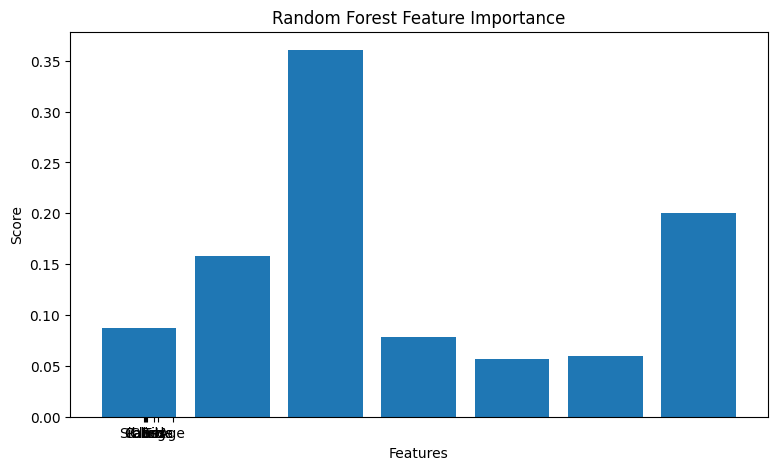

In [76]:
fig = plt.figure(figsize=(9,5))

plt.bar([x for x in range(len(importance))], importance)
plt.title('Random Forest Feature Importance')
plt.xticks(importance, ['Class',  'Sex', 'Age', 'Siblings', 'Parch', 'Cabin', 'Title'])   
plt.ylabel('Score')
plt.xlabel('Features')
plt.show()